This script supports the question analysis. It also considers the length of each question and answer. Additionally it pulls in the lexile score for each book.

## Load Data and Inspect

In [13]:
import pandas as pd 
import numpy as np
#word manipulation
from nltk.tokenize import word_tokenize  

df_questions = pd.read_csv('C:\\Users\\N0209810\\Documents\\Personal\\Grad SChool\\Courses\\w266\\Final Project\\master_questions.csv', '\t',encoding='utf-8')

In [15]:
df_crosswalk = pd.read_csv('C:\\Users\\N0209810\\Documents\\Personal\\Grad SChool\\Courses\\w266\\Final Project\\master_crosswalk.csv',encoding='utf-8')
df_crosswalk.head()

,book_id,question_id,section_id,Gutenberg
0,93,180,30,1
1,93,179,30,1
2,93,178,30,1
3,93,177,30,1
4,93,176,30,1


In [14]:
df_questions.head()

,﻿,question_id,question,answer,book_id,syntax
0,0,0,1. When does Phileas Fogg first meet Jean\r\r\...,"October, 1872",93,True
1,1,1,2. What is the only establishment of which\r\r...,The Reform Club of London,93,True
2,2,2,3. For what job does Fogg hire Passepartout?,To be his servant,93,True
3,3,3,4. What nationality is Jean Passepartout?,French,93,True
4,4,4,5. To what does Passepartout compare his\r\r\r...,Madame Tussand's\r\r\r\nwax museum figures,93,True


In [314]:
df_questions.tail()

,﻿,question_id,question,answer,book_id,syntax
16456,11155,176,176. When William Dobbin and Amelia Sedley are...,Becky Sharp,178,True
16457,11156,177,177. What is true about Becky Sharp's characte...,That she has an actual conscience,178,True
16458,11157,178,178. Which character is enamored by Becky Shar...,Joseph Sedley,178,True
16459,11158,179,179. What becomes of the Sedley house when Bec...,It becomes a social hotpot,178,True
16460,11159,180,180. What happens to Amelia Sedley and William...,They get married,178,True


In [20]:
import re
regex_pat = re.compile(r"^([^.]*).*")
df_questions['question_id'] = df_questions['question'].str.extract(regex_pat).astype('int64')

In [21]:
df_questions.tail()

,﻿,question_id,question,answer,book_id,syntax
16456,11155,176,176. When William Dobbin and Amelia Sedley are...,Becky Sharp,178,True
16457,11156,177,177. What is true about Becky Sharp's characte...,That she has an actual conscience,178,True
16458,11157,178,178. Which character is enamored by Becky Shar...,Joseph Sedley,178,True
16459,11158,179,179. What becomes of the Sedley house when Bec...,It becomes a social hotpot,178,True
16460,11159,180,180. What happens to Amelia Sedley and William...,They get married,178,True


## Merge Datasests & QC

In [29]:
df_merge = pd.merge(df_crosswalk, df_questions, on=['book_id','question_id'], how='outer')
df_merge.tail()

,book_id,question_id,section_id,Gutenberg,﻿,question,answer,syntax
16459,127,80,3,1,2779,80. What is the name of Marius Pontmercy’s fat...,Georges Pontmercy,True
16460,127,81,3,1,2780,81. Marius Pontmercy’s father was a colonel in...,Enjolras Pontmercy,True
16461,127,82,3,1,2781,82. What is Book III’s title in Part III – Mar...,“The Grandfather and the Grandson.”,False
16462,127,83,3,1,2782,83. In what year does Marius turn eighteen in ...,1827,True
16463,127,84,3,1,2783,84. What is the hometown of Marius’s father to...,Vernon,True


In [37]:
df_merge2=df_merge.iloc[:,0:7]

In [42]:
questions = df_merge2.iloc[:,5]

In [253]:
df_merge2[170:180]

,book_id,question_id,section_id,Gutenberg,﻿,question,answer,tokens,what_ind,tokens2,how_ind,where_ind,when_ind,why_ind,who_ind,which_ind,question_type
170,93,10,2,1,9,10. How much is wagered against Fogg being\r\r...,"20,000 pounds","['10', '.', 'How', 'much', 'is', 'wagered', 'a...",False,"['', '.', 'how', 'much', 'is', 'wagered', 'aga...",True,False,False,False,False,False,How
171,93,9,2,1,8,9. What game does Fogg enjoy playing at\r\r\r\...,Whist,"['9', '.', 'What', 'game', 'does', 'Fogg', 'en...",True,"['', '.', 'what', 'game', 'does', 'fogg', 'enj...",False,False,False,False,False,False,What
172,93,8,2,1,7,8. How much is stolen from the bank,"50,000 pounds","['8', '.', 'How', 'much', 'is', 'stolen', 'fro...",False,"['', '.', 'how', 'much', 'is', 'stolen', 'from...",True,False,False,False,False,False,How
173,93,7,2,1,6,7. What bank does Fogg find out has been\r\r\r...,The Bank of England,"['7', '.', 'What', 'bank', 'does', 'Fogg', 'fi...",True,"['', '.', 'what', 'bank', 'does', 'fogg', 'fin...",False,False,False,False,False,False,What
174,93,6,1,1,5,6. Where does Phileas Fogg live,No. 7 Saville Row,"['6', '.', 'Where', 'does', 'Phileas', 'Fogg',...",False,"['', '.', 'where', 'does', 'phileas', 'fogg', ...",False,True,False,False,False,False,Where
175,93,5,1,1,4,5. To what does Passepartout compare his\r\r\r...,Madame Tussand's\r\r\r\nwax museum figures,"['5', '.', 'To', 'what', 'does', 'Passepartout...",True,"['', '.', 'to', 'what', 'does', 'passepartout'...",False,False,False,False,False,False,What
176,93,4,1,1,3,4. What nationality is Jean Passepartout,French,"['4', '.', 'What', 'nationality', 'is', 'Jean'...",True,"['', '.', 'what', 'nationality', 'is', 'jean',...",False,False,False,False,False,False,What
177,93,3,1,1,2,3. For what job does Fogg hire Passepartout,To be his servant,"['3', '.', 'For', 'what', 'job', 'does', 'Fogg...",True,"['', '.', 'for', 'what', 'job', 'does', 'fogg'...",False,False,False,False,False,False,What
178,93,2,1,1,1,2. What is the only establishment of which\r\r...,The Reform Club of London,"['2', '.', 'What', 'is', 'the', 'only', 'estab...",True,"['', '.', 'what', 'is', 'the', 'only', 'establ...",False,False,False,False,False,True,Which
179,93,1,1,1,0,1. When does Phileas Fogg first meet Jean\r\r\...,"October, 1872","['1', '.', 'When', 'does', 'Phileas', 'Fogg', ...",False,"['', '.', 'when', 'does', 'phileas', 'fogg', '...",False,False,True,False,False,False,When


## Tokenize the question and answer column

In [50]:
import nltk
tokens = [t for t in questions.str.split()]
#tokens = set(tokens)
#tokens

In [124]:
df_merge2['question'][170:180]

170    10. How much is wagered against Fogg being\r\r...
171    9. What game does Fogg enjoy playing at\r\r\r\...
172                  8. How much is stolen from the bank
173    7. What bank does Fogg find out has been\r\r\r...
174                      6. Where does Phileas Fogg live
175    5. To what does Passepartout compare his\r\r\r...
176             4. What nationality is Jean Passepartout
177          3. For what job does Fogg hire Passepartout
178    2. What is the only establishment of which\r\r...
179    1. When does Phileas Fogg first meet Jean\r\r\...
Name: question, dtype: object

In [142]:
df_merge2.dtypes

book_id          int64
question_id      int64
section_id       int64
Gutenberg        int64
﻿              float64
question        object
answer          object
tokens          object
what_ind          bool
tokens2        float64
dtype: object

In [145]:
from nltk.tokenize import word_tokenize #sent_tokenize
#sent_tokenize(questions)
df_merge2["question"] = df_merge2["question"].str.replace("[^\w\. \r \n @-]",'')
df_merge2['question'] = df_merge2['question'].astype('str')
df_merge2['tokens'] = df_merge2['question'].apply(word_tokenize)
df_merge2['tokens'] = df_merge2['tokens'].astype('str')
df_merge2['tokens2'] = df_merge2['tokens'].str.replace('\d+', '')
df_merge2['tokens2'] = df_merge2['tokens2'].str.lower()

In [146]:
df_merge2[170:180]

,book_id,question_id,section_id,Gutenberg,﻿,question,answer,tokens,what_ind,tokens2
170,93,10,2,1,9,10. How much is wagered against Fogg being\r\r...,"20,000 pounds","['10', '.', 'How', 'much', 'is', 'wagered', 'a...",False,"['', '.', 'how', 'much', 'is', 'wagered', 'aga..."
171,93,9,2,1,8,9. What game does Fogg enjoy playing at\r\r\r\...,Whist,"['9', '.', 'What', 'game', 'does', 'Fogg', 'en...",True,"['', '.', 'what', 'game', 'does', 'fogg', 'enj..."
172,93,8,2,1,7,8. How much is stolen from the bank,"50,000 pounds","['8', '.', 'How', 'much', 'is', 'stolen', 'fro...",False,"['', '.', 'how', 'much', 'is', 'stolen', 'from..."
173,93,7,2,1,6,7. What bank does Fogg find out has been\r\r\r...,The Bank of England,"['7', '.', 'What', 'bank', 'does', 'Fogg', 'fi...",True,"['', '.', 'what', 'bank', 'does', 'fogg', 'fin..."
174,93,6,1,1,5,6. Where does Phileas Fogg live,No. 7 Saville Row,"['6', '.', 'Where', 'does', 'Phileas', 'Fogg',...",False,"['', '.', 'where', 'does', 'phileas', 'fogg', ..."
175,93,5,1,1,4,5. To what does Passepartout compare his\r\r\r...,Madame Tussand's\r\r\r\nwax museum figures,"['5', '.', 'To', 'what', 'does', 'Passepartout...",False,"['', '.', 'to', 'what', 'does', 'passepartout'..."
176,93,4,1,1,3,4. What nationality is Jean Passepartout,French,"['4', '.', 'What', 'nationality', 'is', 'Jean'...",True,"['', '.', 'what', 'nationality', 'is', 'jean',..."
177,93,3,1,1,2,3. For what job does Fogg hire Passepartout,To be his servant,"['3', '.', 'For', 'what', 'job', 'does', 'Fogg...",False,"['', '.', 'for', 'what', 'job', 'does', 'fogg'..."
178,93,2,1,1,1,2. What is the only establishment of which\r\r...,The Reform Club of London,"['2', '.', 'What', 'is', 'the', 'only', 'estab...",True,"['', '.', 'what', 'is', 'the', 'only', 'establ..."
179,93,1,1,1,0,1. When does Phileas Fogg first meet Jean\r\r\...,"October, 1872","['1', '.', 'When', 'does', 'Phileas', 'Fogg', ...",False,"['', '.', 'when', 'does', 'phileas', 'fogg', '..."


# Analysis of Questions

In [98]:
#combine resulting list of tokens into 1 big list
all_tokens = []
for wordList in df_merge2['tokens']:
    all_tokens += wordList
all_tokens

['180',
 '.',
 'How',
 'many',
 'days',
 'after',
 'returning',
 'home',
 'are',
 'Fogg',
 'and',
 'Aouda',
 'married',
 '179',
 '.',
 'What',
 'does',
 'Fogg',
 'get',
 'from',
 'his',
 'journey',
 'around',
 'the',
 'world',
 '178.',
 'Who',
 'says',
 'That',
 'we',
 'might',
 'have',
 'made',
 'the',
 'tour',
 'of',
 'the',
 'world',
 'in',
 'only',
 'seventy-eight',
 'days',
 '.',
 '177',
 '.',
 'What',
 'does',
 'Passepartout',
 'do',
 'with',
 'the',
 'remaining',
 'money',
 'from',
 'his',
 'journey',
 '176',
 '.',
 'What',
 'does',
 'Passepartout',
 'discover',
 'on',
 'his',
 'errand',
 '175',
 '.',
 'What',
 'errand',
 'does',
 'Fogg',
 'send',
 'Passepartout',
 'on',
 'after',
 'speaking',
 'with',
 'Aouda',
 '174',
 '.',
 'What',
 'does',
 'Fogg',
 'say',
 'to',
 'his',
 'friends',
 'at',
 'the',
 'Reform',
 'Club',
 '173',
 '.',
 'How',
 'long',
 'does',
 'Fogg',
 'have',
 'to',
 'spare',
 'before',
 'appearing',
 'in',
 'the',
 'salon',
 '172',
 '.',
 'Where',
 'do',
 'Fo

In [99]:
# convert to lower case
all_tokens = [w.lower() for w in all_tokens]
# remove punctuation from each word
#import string
#table = str.maketrans('', '', string.punctuation)

In [103]:
#remove stop words
#had to use custom list because key question words (who, what, when) are typically stop words
from nltk.corpus import stopwords
#stop_w = stopwords.words('english')
custom_stop_words =['chapter','book','and', 'he', 'she', 'his', 'her', 'i', 'the','a', 'of', 'an', 'to', 'in', 'that','is', 'with', 'as' ,'it', '.']
clean_tokens = all_tokens
for token in all_tokens:
    if token in custom_stop_words: #stopwords.words('english'):
        clean_tokens.remove(token)

In [104]:
freq = nltk.FreqDist(clean_tokens) 
freq

FreqDist({'what': 8734, 'does': 7210, 'who': 2574, 'do': 2001, 'how': 1968, 'when': 1925, 'at': 1508, 'for': 1429, 'about': 1259, 'after': 1194, ...})

In [105]:
for key,val in freq.items():
    print (str(key) + ':' + str(val))

nunnery:2
yellow:3
four:34
gag:2
woods:27
blakeneys:16
hanging:7
conjure:1
looking:39
pardon:2
granting:1
eligible:1
scold:1
demoted:1
lord:106
benvolio:10
shaving:1
sinking:2
fyodor:18
regional:1
magwitch:16
stipulate:1
classifications:1
stabbed:4
bringing:5
advices:1
disturb:2
emilys:1
prize:9
wooden:9
solid:1
succession:1
ornamental:2
charter:2
dmitrievnas:2
tired:6
preface:22
27.:14
tires:1
271:1
second:90
273:1
274:1
275:1
276:1
277:1
278:1
eleanors:1
sailed:1
loathing:1
errors:1
whaling:9
thunder:2
cooking:1
contributed:2
fingers:4
fossil:6
thronton:1
marksville:3
increasing:2
admiral:7
shocks:2
hero:11
avery:5
herb:1
mildreds:1
elaines:1
here:4
reported:2
china:1
hers:1
herr:26
confronts:7
separation:4
kids:1
elaborate:1
reports:6
controversy:3
menu:1
natures:1
military:17
out-maneuvered:1
golden:9
rosencrantz:15
nellys:2
explained:2
gloaming:1
replace:3
brought:22
remnant:1
stern:2
unit:1
hoping:2
catchs:1
cheating:1
spoke:5
ithe:1
music:16
therefore:2
passport:3
moralistic:1
s

In [111]:
words, counts = zip(*freq.most_common(20))
words= list(words)


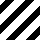
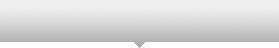
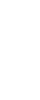
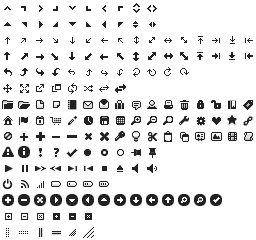
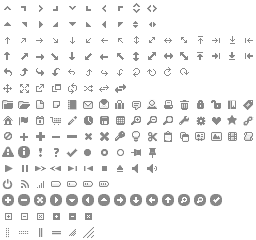
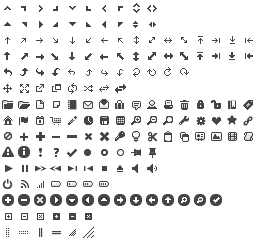
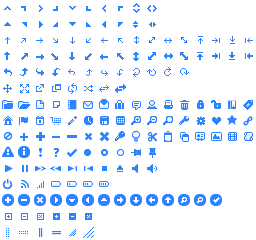
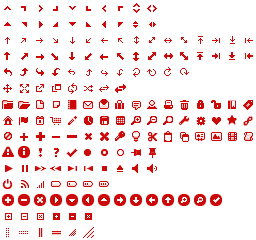
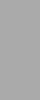
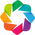
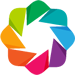
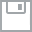
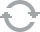
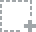
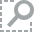
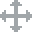
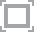
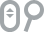

In [120]:
# Bokeh for plotting.
#utils.require_package("bokeh")
import bokeh.plotting as bp
from bokeh.models import HoverTool
bp.output_notebook()

hover = HoverTool(tooltips=[("word", "@x"), ("count", "@top")], mode="vline")
fig = bp.figure(x_range=words, plot_width=800, plot_height=400, tools=[hover])
fig.rect(x=words, width=0.8, height = 100, y=counts, hover_fill_color="firebrick")
#original
#fig.vbar(x=words, width=0.8, top=counts, hover_fill_color="firebrick")
fig.y_range.start = 0
fig.yaxis.axis_label = "Count(w)"
bp.show(fig)

In [121]:
freq.plot(20, cumulative=False)

In [153]:
df_merge2['what_ind'] = df_merge2['tokens2'].str.contains("what")
df_merge2['how_ind'] = df_merge2['tokens2'].str.contains("how")
df_merge2['where_ind'] = df_merge2['tokens2'].str.contains("where")
df_merge2['when_ind'] = df_merge2['tokens2'].str.contains("when")
df_merge2['why_ind'] = df_merge2['tokens2'].str.contains("why")
df_merge2['who_ind'] = df_merge2['tokens2'].str.contains("who")
df_merge2['which_ind'] = df_merge2['tokens2'].str.contains("which")

In [312]:
df_merge2 [170:180]

,book_id,question_id,section_id,Gutenberg,﻿,question,answer,tokens,what_ind,tokens2,how_ind,where_ind,when_ind,why_ind,who_ind,which_ind,question_type
170,93,10,2,1,9,10. How much is wagered against Fogg being\r\r...,"20,000 pounds","['10', '.', 'How', 'much', 'is', 'wagered', 'a...",False,"['', '.', 'how', 'much', 'is', 'wagered', 'aga...",True,False,False,False,False,False,How
171,93,9,2,1,8,9. What game does Fogg enjoy playing at\r\r\r\...,Whist,"['9', '.', 'What', 'game', 'does', 'Fogg', 'en...",True,"['', '.', 'what', 'game', 'does', 'fogg', 'enj...",False,False,False,False,False,False,What
172,93,8,2,1,7,8. How much is stolen from the bank,"50,000 pounds","['8', '.', 'How', 'much', 'is', 'stolen', 'fro...",False,"['', '.', 'how', 'much', 'is', 'stolen', 'from...",True,False,False,False,False,False,How
173,93,7,2,1,6,7. What bank does Fogg find out has been\r\r\r...,The Bank of England,"['7', '.', 'What', 'bank', 'does', 'Fogg', 'fi...",True,"['', '.', 'what', 'bank', 'does', 'fogg', 'fin...",False,False,False,False,False,False,What
174,93,6,1,1,5,6. Where does Phileas Fogg live,No. 7 Saville Row,"['6', '.', 'Where', 'does', 'Phileas', 'Fogg',...",False,"['', '.', 'where', 'does', 'phileas', 'fogg', ...",False,True,False,False,False,False,Where
175,93,5,1,1,4,5. To what does Passepartout compare his\r\r\r...,Madame Tussand's\r\r\r\nwax museum figures,"['5', '.', 'To', 'what', 'does', 'Passepartout...",True,"['', '.', 'to', 'what', 'does', 'passepartout'...",False,False,False,False,False,False,What
176,93,4,1,1,3,4. What nationality is Jean Passepartout,French,"['4', '.', 'What', 'nationality', 'is', 'Jean'...",True,"['', '.', 'what', 'nationality', 'is', 'jean',...",False,False,False,False,False,False,What
177,93,3,1,1,2,3. For what job does Fogg hire Passepartout,To be his servant,"['3', '.', 'For', 'what', 'job', 'does', 'Fogg...",True,"['', '.', 'for', 'what', 'job', 'does', 'fogg'...",False,False,False,False,False,False,What
178,93,2,1,1,1,2. What is the only establishment of which\r\r...,The Reform Club of London,"['2', '.', 'What', 'is', 'the', 'only', 'estab...",True,"['', '.', 'what', 'is', 'the', 'only', 'establ...",False,False,False,False,False,True,Which
179,93,1,1,1,0,1. When does Phileas Fogg first meet Jean\r\r\...,"October, 1872","['1', '.', 'When', 'does', 'Phileas', 'Fogg', ...",False,"['', '.', 'when', 'does', 'phileas', 'fogg', '...",False,False,True,False,False,False,When


In [159]:
df_merge2['question_type'] = "Other"
df_merge2['question_type'][df_merge2['what_ind']==True] = 'What'
df_merge2['question_type'][df_merge2['how_ind']==True] = 'How'
df_merge2['question_type'][df_merge2['where_ind']==True] = 'Where'
df_merge2['question_type'][df_merge2['when_ind']==True] = 'When'
df_merge2['question_type'][df_merge2['why_ind']==True] = 'Why'
df_merge2['question_type'][df_merge2['who_ind']==True] = 'Who'
df_merge2['question_type'][df_merge2['which_ind']==True] = 'Which'

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A v

In [162]:
df_merge2 [1:7]

,book_id,question_id,section_id,Gutenberg,﻿,question,answer,tokens,what_ind,tokens2,how_ind,where_ind,when_ind,why_ind,who_ind,which_ind,question_type
1,93,179,30,1,178,179. What does Fogg get from his journey\r\r\r...,All of these,"['179', '.', 'What', 'does', 'Fogg', 'get', 'f...",True,"['', '.', 'what', 'does', 'fogg', 'get', 'from...",False,False,False,False,False,False,What
2,93,178,30,1,177,178. Who says That we might have\r\r\r\nmade t...,Passepartout,"['178.', 'Who', 'says', 'That', 'we', 'might',...",False,"['.', 'who', 'says', 'that', 'we', 'might', 'h...",False,False,False,False,True,False,Who
3,93,177,30,1,176,177. What does Passepartout do with the\r\r\r\...,He splits it between Passepartout and Fix,"['177', '.', 'What', 'does', 'Passepartout', '...",True,"['', '.', 'what', 'does', 'passepartout', 'do'...",False,False,False,False,False,False,What
4,93,176,30,1,175,176. What does Passepartout discover on\r\r\r\...,"They arrived on Saturday, not Sunday","['176', '.', 'What', 'does', 'Passepartout', '...",True,"['', '.', 'what', 'does', 'passepartout', 'dis...",False,False,False,False,False,False,What
5,93,175,30,1,174,175. What errand does Fogg send\r\r\r\nPassepa...,To secure a minister,"['175', '.', 'What', 'errand', 'does', 'Fogg',...",True,"['', '.', 'what', 'errand', 'does', 'fogg', 's...",False,False,False,False,False,False,What
6,93,174,29,1,173,174. What does Fogg say to his friends at\r\r\...,"Here I am, gentlemen!","['174', '.', 'What', 'does', 'Fogg', 'say', 't...",True,"['', '.', 'what', 'does', 'fogg', 'say', 'to',...",False,False,False,False,False,False,What


In [224]:
table = pd.pivot_table(df_merge2,columns ='question_type', values = 'Gutenberg', aggfunc=np.sum)
#table2 =  table.div()                   
print (table)

question_type
How      1742
Other     445
What     7181
When     1573
Where     921
Which     593
Who      2915
Why      1094
Name: Gutenberg, dtype: int64


In [242]:
question_summary = pd.crosstab(index = df_merge2['question_type'], columns='count')
question_summary.sort('count', ascending=False)

col_0,count
question_type,
What,7181
Who,2915
How,1742
When,1573
Why,1094
Where,921
Which,593
Other,445


In [241]:
question_summary_pct = question_summary/question_summary.sum()
question_summary_pct.sort('count', ascending=False)
#question_summary_pct= question_summary_pct.style.format("{:.1%}")

col_0,count
question_type,
What,0.436164
Who,0.177053
How,0.105807
When,0.095542
Why,0.066448
Where,0.055940
Which,0.036018
Other,0.027029


In [247]:
question_summary = pd.crosstab(index = df_merge2['question_type'],  columns=['count'])
question_summary

col_0,count
col_1,book_id
question_type,
How,1742
Other,445
What,7181
When,1573
Where,921
Which,593
Who,2915
Why,1094


In [259]:
#question length distribution
question_length_dist = df_merge2['question'].str.split().apply(len).value_counts()
question_length_dist

11    1669
12    1607
10    1561
13    1460
9     1413
14    1289
8     1175
15    1065
16     864
7      773
17     706
6      495
18     465
19     407
20     282
5      251
21     212
22     150
23     131
24      89
4       81
25      71
26      43
27      43
30      26
29      24
28      24
31      22
32      11
33      11
34       9
35       4
37       4
36       4
1        3
38       3
39       3
45       2
47       2
44       2
42       2
50       1
49       1
51       1
48       1
56       1
40       1
dtype: int64

In [280]:
question_length_dist = pd.DataFrame(question_length_dist)

In [287]:
question_length_dist.index

Int64Index([11, 12, 10, 13,  9, 14,  8, 15, 16,  7, 17,  6, 18, 19, 20,  5, 21,
            22, 23, 24,  4, 25, 26, 27, 30, 29, 28, 31, 32, 33, 34, 35, 37, 36,
             1, 38, 39, 45, 47, 44, 42, 50, 49, 51, 48, 56, 40],
           dtype='int64')

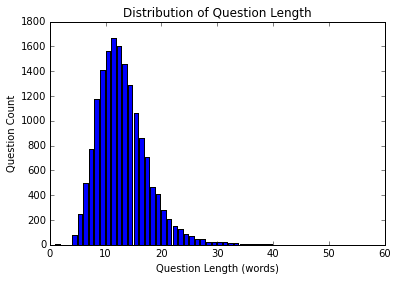

In [309]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(question_length_dist.index,  question_length_dist[0])
plt.xlabel('Question Length (words)')
plt.ylabel("Question Count")
plt.title("Distribution of Question Length")

In [ ]:
question_length_dist = df_merge2['question'].str.split().apply(len)

In [317]:
df_merge2["answer"] = df_merge2["answer"].str.replace("[^\w\. \r \n @-]",'')
df_merge2['answer'] = df_merge2['answer'].astype('str')
answer_length_dist = df_merge2['answer'].str.split().apply(len).value_counts()
answer_length_dist

1     3908
2     3346
3     2244
4     1506
5     1226
6     1045
7      783
8      627
9      458
10     365
11     279
12     200
13     143
14     110
15      59
16      51
17      24
19      20
18      17
20      16
21      12
23       7
22       5
24       4
28       4
26       3
25       1
32       1
dtype: int64

# Answer Length EDA

In [320]:
answer_length_dist = pd.DataFrame(answer_length_dist)

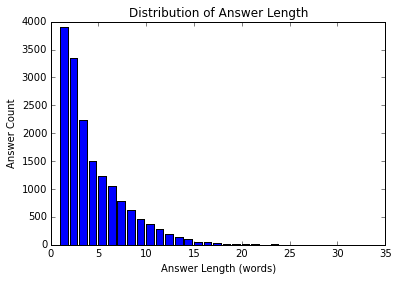

In [321]:
plt.bar(answer_length_dist.index,  answer_length_dist[0])
plt.xlabel('Answer Length (words)')
plt.ylabel("Answer Count")
plt.title("Distribution of Answer Length")

In [323]:
df_merge2['answer_len'] = df_merge2['answer'].str.split().apply(len)

In [324]:
df_merge2['question_len'] = df_merge2['question'].str.split().apply(len)

In [325]:
np.average(df_merge2['answer'].str.split().apply(len))

4.0618318756073855

In [326]:
np.average(df_merge2['question'].str.split().apply(len))

12.634961127308067

In [328]:
df_merge2[170:180]

,book_id,question_id,section_id,Gutenberg,﻿,question,answer,tokens,what_ind,tokens2,how_ind,where_ind,when_ind,why_ind,who_ind,which_ind,question_type,answer_len,question_len
170,93,10,2,1,9,10. How much is wagered against Fogg being\r\r...,20000 pounds,"['10', '.', 'How', 'much', 'is', 'wagered', 'a...",False,"['', '.', 'how', 'much', 'is', 'wagered', 'aga...",True,False,False,False,False,False,How,2,16
171,93,9,2,1,8,9. What game does Fogg enjoy playing at\r\r\r\...,Whist,"['9', '.', 'What', 'game', 'does', 'Fogg', 'en...",True,"['', '.', 'what', 'game', 'does', 'fogg', 'enj...",False,False,False,False,False,False,What,1,11
172,93,8,2,1,7,8. How much is stolen from the bank,50000 pounds,"['8', '.', 'How', 'much', 'is', 'stolen', 'fro...",False,"['', '.', 'how', 'much', 'is', 'stolen', 'from...",True,False,False,False,False,False,How,2,8
173,93,7,2,1,6,7. What bank does Fogg find out has been\r\r\r...,The Bank of England,"['7', '.', 'What', 'bank', 'does', 'Fogg', 'fi...",True,"['', '.', 'what', 'bank', 'does', 'fogg', 'fin...",False,False,False,False,False,False,What,4,10
174,93,6,1,1,5,6. Where does Phileas Fogg live,No. 7 Saville Row,"['6', '.', 'Where', 'does', 'Phileas', 'Fogg',...",False,"['', '.', 'where', 'does', 'phileas', 'fogg', ...",False,True,False,False,False,False,Where,4,6
175,93,5,1,1,4,5. To what does Passepartout compare his\r\r\r...,Madame Tussands\r\r\r\nwax museum figures,"['5', '.', 'To', 'what', 'does', 'Passepartout...",True,"['', '.', 'to', 'what', 'does', 'passepartout'...",False,False,False,False,False,False,What,5,9
176,93,4,1,1,3,4. What nationality is Jean Passepartout,French,"['4', '.', 'What', 'nationality', 'is', 'Jean'...",True,"['', '.', 'what', 'nationality', 'is', 'jean',...",False,False,False,False,False,False,What,1,6
177,93,3,1,1,2,3. For what job does Fogg hire Passepartout,To be his servant,"['3', '.', 'For', 'what', 'job', 'does', 'Fogg...",True,"['', '.', 'for', 'what', 'job', 'does', 'fogg'...",False,False,False,False,False,False,What,4,8
178,93,2,1,1,1,2. What is the only establishment of which\r\r...,The Reform Club of London,"['2', '.', 'What', 'is', 'the', 'only', 'estab...",True,"['', '.', 'what', 'is', 'the', 'only', 'establ...",False,False,False,False,False,True,Which,5,12
179,93,1,1,1,0,1. When does Phileas Fogg first meet Jean\r\r\...,October 1872,"['1', '.', 'When', 'does', 'Phileas', 'Fogg', ...",False,"['', '.', 'when', 'does', 'phileas', 'fogg', '...",False,False,True,False,False,False,When,2,9


## Merging Lexile Score

In [332]:
#add Lexical Score
df_lex= pd.read_csv('C:\\Users\\N0209810\\Documents\\Personal\\Grad SChool\\Courses\\w266\\Final Project\\master_lexile.csv',encoding='utf-8')
df_lex.head()

,book_id,lexile_score
0,12,1000
1,35,1300
2,77,590
3,79,980
4,83,980


In [333]:
df_lex.dtypes

book_id         int64
lexile_score    int64
dtype: object

In [338]:
df_merge3 = pd.merge(df_merge2, df_lex, on=['book_id'], how='outer')
df_merge3[170:175]

,book_id,question_id,section_id,Gutenberg,﻿,question,answer,tokens,what_ind,tokens2,how_ind,where_ind,when_ind,why_ind,who_ind,which_ind,question_type,answer_len,question_len,lexile_score
170,93,10,2,1,9,10. How much is wagered against Fogg being\r\r...,20000 pounds,"['10', '.', 'How', 'much', 'is', 'wagered', 'a...",False,"['', '.', 'how', 'much', 'is', 'wagered', 'aga...",True,False,False,False,False,False,How,2,16,1070
171,93,9,2,1,8,9. What game does Fogg enjoy playing at\r\r\r\...,Whist,"['9', '.', 'What', 'game', 'does', 'Fogg', 'en...",True,"['', '.', 'what', 'game', 'does', 'fogg', 'enj...",False,False,False,False,False,False,What,1,11,1070
172,93,8,2,1,7,8. How much is stolen from the bank,50000 pounds,"['8', '.', 'How', 'much', 'is', 'stolen', 'fro...",False,"['', '.', 'how', 'much', 'is', 'stolen', 'from...",True,False,False,False,False,False,How,2,8,1070
173,93,7,2,1,6,7. What bank does Fogg find out has been\r\r\r...,The Bank of England,"['7', '.', 'What', 'bank', 'does', 'Fogg', 'fi...",True,"['', '.', 'what', 'bank', 'does', 'fogg', 'fin...",False,False,False,False,False,False,What,4,10,1070
174,93,6,1,1,5,6. Where does Phileas Fogg live,No. 7 Saville Row,"['6', '.', 'Where', 'does', 'Phileas', 'Fogg',...",False,"['', '.', 'where', 'does', 'phileas', 'fogg', ...",False,True,False,False,False,False,Where,4,6,1070


In [345]:
#export final dataset
df_merge3.to_csv('master_questions_eda.csv', '\t',encoding='utf-8')

# Length Outlier EDA

In [348]:
df_merge3[df_merge3['answer_len']>15]

,book_id,question_id,section_id,Gutenberg,﻿,question,answer,tokens,what_ind,tokens2,how_ind,where_ind,when_ind,why_ind,who_ind,which_ind,question_type,answer_len,question_len,lexile_score
693,174,27,4,1,10646,27. Why must Lily comply with Mrs. Trenors req...,She is the least wealthy member of her social ...,"['27', '.', 'Why', 'must', 'Lily', 'comply', '...",False,"['', '.', 'why', 'must', 'lily', 'comply', 'wi...",False,False,False,True,False,False,Why,19,14,1230
697,174,23,3,1,10642,23. Why is Lily envious of Mrs. Bertha Dorsets...,She envies the freedom of a married woman to g...,"['23', '.', 'Why', 'is', 'Lily', 'envious', 'o...",False,"['', '.', 'why', 'is', 'lily', 'envious', 'of'...",False,False,False,True,False,False,Why,16,16,1230
698,174,22,3,1,10641,22. How does Lily view the results of her acti...,She views her gambling losses as a small price...,"['22', '.', 'How', 'does', 'Lily', 'view', 'th...",False,"['', '.', 'how', 'does', 'lily', 'view', 'the'...",True,False,False,False,False,False,How,17,16,1230
706,174,14,2,1,10633,14. Why is Lily angry with herself following t...,She is angry because she didnt think quickly e...,"['14', '.', 'Why', 'is', 'Lily', 'angry', 'wit...",False,"['', '.', 'why', 'is', 'lily', 'angry', 'with'...",False,False,False,True,False,False,Why,17,21,1230
903,172,177,5,1,10436,177. According to Anne what was the reason tha...,Because a picture they had seen in class that ...,"['177', '.', 'According', 'to', 'Anne', 'what'...",True,"['', '.', 'according', 'to', 'anne', 'what', '...",False,False,False,False,False,False,What,24,22,1200
909,172,171,5,1,10430,171. What was Solomons reaction upon Burchs re...,That the final judgment was yet to be issued i...,"['171', '.', 'What', 'was', 'Solomons', 'react...",True,"['', '.', 'what', 'was', 'solomons', 'reaction...",False,False,False,False,False,False,What,19,8,1200
912,172,168,5,1,10427,168. What did Solomon do when he arrived in RI...,They filed a complaint against James Burch for...,"['168', '.', 'What', 'did', 'Solomon', 'do', '...",True,"['', '.', 'what', 'did', 'solomon', 'do', 'whe...",False,False,True,False,False,False,When,16,10,1200
918,172,162,5,1,10421,162. What was it that Edwin Epps wanted from S...,The identity of the person who had written the...,"['162', '.', 'What', 'was', 'it', 'that', 'Edw...",True,"['', '.', 'what', 'was', 'it', 'that', 'edwin'...",False,False,False,False,False,False,What,16,25,1200
922,172,158,5,1,10417,158. What caused the action of the Marksville ...,Fear of the possibility that Epps might try to...,"['158', '.', 'What', 'caused', 'the', 'action'...",True,"['', '.', 'what', 'caused', 'the', 'action', '...",False,False,False,False,False,False,What,24,18,1200
930,172,150,5,1,10409,150. What two facts had to be established in o...,That Solomon was a citizen of New York and tha...,"['150', '.', 'What', 'two', 'facts', 'had', 't...",True,"['', '.', 'what', 'two', 'facts', 'had', 'to',...",False,False,False,False,False,False,What,17,16,1200


In [355]:
table = pd.pivot_table(df_merge2,columns ='book_id', values = 'answer_len', aggfunc=np.mean)
#table2 =  table.div()                   
print (table)
#question_summary = pd.crosstab(index = df_merge2['question_type'], columns='count')
#question_summary.sort('count', ascending=False)

book_id
12      3.038889
35      3.366667
77      2.727778
79      6.022222
83      5.372222
84      2.916667
85      6.305556
86      4.250000
87      2.638889
88      2.411111
89      3.034483
90      4.472222
91      5.100000
92      2.377778
93      3.222222
94      3.033333
95      3.705556
96      3.333333
98      2.700000
100     3.716667
101     2.544444
102     5.600000
103     4.005556
104     5.905556
105     2.272222
106     4.588889
108     3.077778
109     7.261111
110     2.222222
111    11.455556
         ...    
143     2.933333
144     2.933333
145     2.455556
146     3.700000
147     3.983333
148     2.822222
150     9.255556
151     4.194444
152     4.522222
153     3.100000
154     4.461111
155     2.911111
156     2.800000
157     3.872222
158     4.772222
160     5.572222
161     4.144444
162     5.111111
163     2.777778
164     6.316667
165     2.294444
166     3.344444
167     7.788889
168     2.400000
171     5.138889
172     7.477778
173     3.566667
174   

In [358]:
table

,answer_len
book_id,
12,3.038889
35,3.366667
77,2.727778
79,6.022222
83,5.372222
84,2.916667
85,6.305556
86,4.250000
87,2.638889


In [359]:
table.index

Int64Index([ 12,  35,  77,  79,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  98, 100, 101, 102, 103, 104, 105, 106,
            108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
            121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134,
            135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
            148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162,
            163, 164, 165, 166, 167, 168, 171, 172, 173, 174, 175, 178],
           dtype='int64', name=u'book_id')

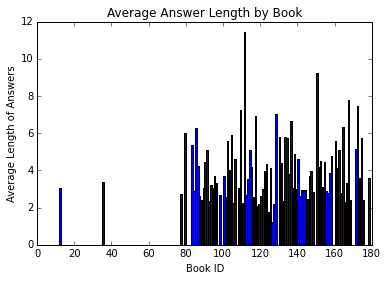

In [362]:
table = pd.DataFrame(table)
plt.bar(table.index,  table['answer_len'])
plt.xlabel('Book ID')
plt.ylabel("Average Length of Answers")
plt.title("Average Answer Length by Book")

In [363]:
table2 = pd.pivot_table(df_merge2,columns ='book_id', values = 'question_len', aggfunc=np.mean)
#table2 =  table.div()                   
print (table2)

book_id
12     10.255556
35     10.733333
77      9.700000
79     11.655556
83     13.261111
84      9.305556
85     12.311111
86     14.777778
87     12.183333
88     13.094444
89     13.068966
90     13.983333
91     11.633333
92     12.227778
93     12.277778
94     15.805556
95     13.677778
96     10.855556
98     13.511111
100    14.494444
101    11.700000
102    13.072222
103    13.188889
104    12.461111
105     8.788889
106    10.822222
108    11.988889
109    14.444444
110    11.533333
111    14.788889
         ...    
143    10.894444
144    13.450000
145    12.538889
146    13.477778
147    11.994444
148    13.083333
150    13.950000
151    14.722222
152    12.172222
153     8.561111
154     9.622222
155    10.944444
156     9.833333
157    12.438889
158     9.661111
160    11.838889
161    12.050000
162    14.477778
163    10.422222
164    16.033333
165    22.922222
166    12.205556
167    18.727778
168    14.022222
171    12.688889
172    16.894444
173    11.616667
174   

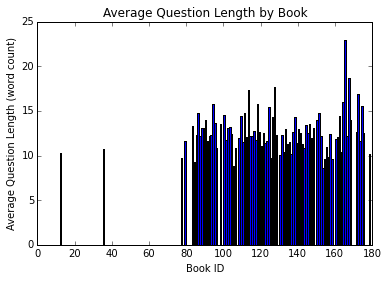

In [365]:
answer_length_dist = pd.DataFrame(table2)
plt.bar(answer_length_dist.index,  answer_length_dist['question_len'])
plt.xlabel('Book ID')
plt.ylabel("Average Question Length (word count)")
plt.title("Average Question Length by Book")

If the data wasn't already so thin and with more time, I would take out the books that are high outliers (in terms of either question length or answer length) and rework the questions/answers to be more similiar